In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

**Author**: https://www.kaggle.com/harlfoxem/  
https://www.kaggle.com/harlfoxem/  
**Source**: [original](https://www.kaggle.com/harlfoxem/housesalesprediction) - 2016-08-25  
**Please cite**:   

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It contains 19 house features plus the price and the id columns, along with 21613 observations.
It's a great dataset for evaluating simple regression models.

* Id: Unique ID for each home sold
* Date: Date of the home sale
* Price: Price of each home sold
* Bedrooms: Number of bedrooms
* Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* Sqft_living: Square footage of the apartments interior living space
* Sqft_lot: Square footage of the land space
* Floors: Number of floors
* Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
* View: An index from 0 to 4 of how good the view of the property was
* Condition: An index from 1 to 5 on the condition of the apartment
* Grade: An index from 1 to 13, where 1-3 falls short of the building construction and design, 7 has an average level of  construction and design, and 11-13 have a high quality level of construction and design
* Sqft_above: The square footage of the interior housing space that is above ground level.
* Sqft_basement: The square footage of the interior housing space that is below ground level.
* Yr_built: The year the house was initially built
* Yr_renovated: The year of the house's last renovation
* Zipcode: What zipcode area the house is in
* Lat: Lattitude
* Long: Longitude
* Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors.
* Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
data = fetch_openml("house_sales", as_frame=True)
print(data.DESCR)

/home/andy/checkout/scikit-learn/sklearn/datasets/_openml.py:372: UserWarning: Multiple active versions of the dataset matching the name house_sales exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It contains 19 house features plus the price and the id columns, along with 21613 observations.
It's a great dataset for evaluating simple regression models.

Downloaded from openml.org.


In [3]:
data.frame.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
data.frame.drop(['date', 'price'], axis=1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21609,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21610,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21611,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


In [5]:
target = data.frame.price
df = data.frame.drop(['date', 'price', 'zipcode'], axis=1)

In [6]:
X = df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
X.shape

(21613, 17)

In [8]:
from dabl.plot.utils import _find_inliers

In [9]:
X.bathrooms.quantile(q=.99)

4.25

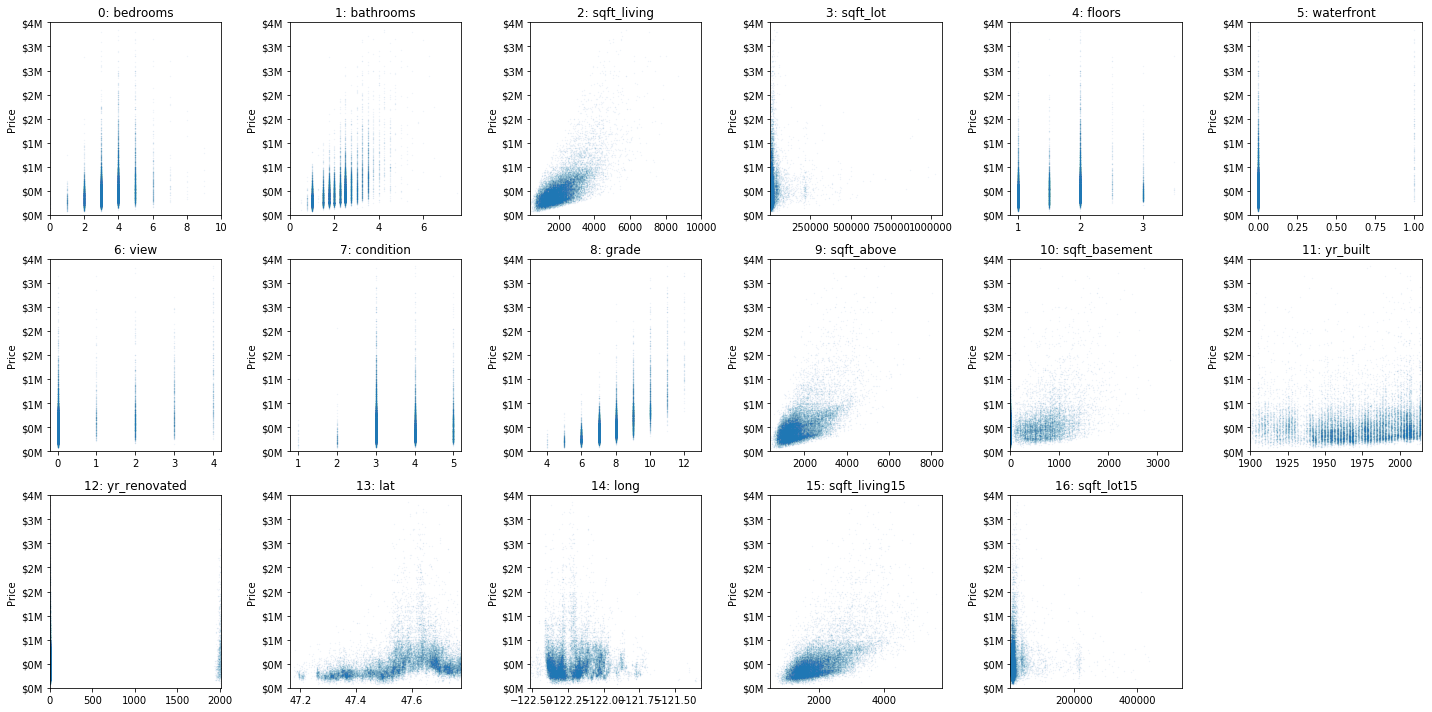

In [10]:
# FuncFormatter can be used as a decorator
import matplotlib.ticker as ticker

@ticker.FuncFormatter
def million_formatter(x, pos):
    return f"${int(x / 10 ** 6)}M"


fig, axes = plt.subplots(3, 6, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    X_col = X.iloc[:, i]
    ax.yaxis.set_major_formatter(million_formatter)
    # set ticks to disregard outliers
    ax.set_ylim(0, 4000000)
    if X_col.nunique() > 10:
        ax.set_xlim(X_col.quantile(q=.0001), X_col.quantile(q=.9999))
    ax.scatter(X_col, y, alpha=.1, s=.1)
    ax.set_title("{}: {}".format(i, X.columns[i]))
    ax.set_ylabel("Price")
plt.tight_layout()
plt.savefig("images/house_price_scatter.png")

In [ ]:
X.plot(kind='box', rot=90, logy=True)
plt.savefig("images/house_price_boxplot.png")

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3 

plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")
other_axes = [plt.subplot2grid((2, 4), (i, j))
              for j in range(2, 4) for i in range(2)]

for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                   MinMaxScaler(), Normalizer(norm='l2')]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

for ax in other_axes:
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


In [ ]:
X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
scores = cross_val_score(RidgeCV(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

In [ ]:
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

In [ ]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):
    # multiclass                                                                  
    if eps is None:                                                               
        eps = X.std(axis=0) / 2.
    else:
        eps = np.array([eps, eps])

    if ax is None:                                                                
        ax = plt.gca()                                                            

    x_min, x_max = X[:, 0].min() - eps[0], X[:, 0].max() + eps[0]
    y_min, y_max = X[:, 1].min() - eps[1], X[:, 1].max() + eps[1]
    # these should be 1000 but knn predict is unnecessarily slow
    xx = np.linspace(x_min, x_max, 100)                                          
    yy = np.linspace(y_min, y_max, 100)                                          

    X1, X2 = np.meshgrid(xx, yy)                                                  
    X_grid = np.c_[X1.ravel(), X2.ravel()]                                        
    decision_values = classifier.predict(X_grid)                                  
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,            
                                                       y_min, y_max),             
            aspect='auto', origin='lower', alpha=alpha, cmap=plt.cm.bwr)          

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

X, y = make_blobs(centers=2, random_state=4, n_samples=30)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))


X = X * np.array([1000, 1])

# a carefully hand-designed dataset lol
y[7] = 0
y[27] = 0

knn = KNeighborsClassifier(algorithm='kd_tree').fit(X, y)

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
axes[0].set_title("KNN w/o scaling")
# only adjust plot, don't actually plot alpha=0
plot_2d_classification(knn, X, ax=axes[0], alpha=0)


X_scaled = scale(X)
knn_scaled = KNeighborsClassifier(algorithm='kd_tree').fit(X_scaled, y)

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr')
axes[1].set_title("KNN with scaling")
# only adjust plot, don't actually plot alpha=0
plot_2d_classification(knn_scaled, X_scaled, ax=axes[1], alpha=0)

plt.savefig("images/knn_scaling.png")

plot_2d_classification(knn, X, ax=axes[0], alpha=.2)
plot_2d_classification(knn_scaled, X_scaled, ax=axes[1], alpha=.3)
plt.savefig("images/knn_scaling2.png")


# Pipelines

# Not using Pipelines vs feature selection

In [ ]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
X_test = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))
y_test = rnd.normal(size=(100,))

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression,
                          percentile=5)
select.fit(X, y)
X_selected = select.transform(X)
print(X_selected.shape)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
np.mean(cross_val_score(Ridge(), X_selected, y))

In [ ]:
ridge = Ridge().fit(X_selected, y)
X_test_selected = select.transform(X_test)
ridge.score(X_test_selected, y_test)

# Back to house price?

In [ ]:
from sklearn.linear_model import Ridge
X, y = df, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

In [ ]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

In [ ]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
X_test = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))
y_test = rnd.normal(size=(100,))

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("select", select),
                 ("ridge", Ridge())])
np.mean(cross_val_score(pipe, X, y))

In [ ]:
from sklearn.linear_model import Ridge
X, y = df, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline((("scaler", StandardScaler()),
                 ("regressor", KNeighborsRegressor)))

In [ ]:
from sklearn.model_selection import GridSearchCV

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

In [ ]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid,
                    n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

In [ ]:
from sklearn.linear_model import Lasso

pipe = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge())])

param_grid = {'scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'regressor': [Ridge(), Lasso()],
              'regressor__alpha': np.logspace(-3, 3, 7)}


grid = GridSearchCV(pipe, param_grid)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

In [35]:

from sklearn.tree import DecisionTreeRegressor
pipe = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge())])

param_grid = [{'regressor': [DecisionTreeRegressor()],
               'regressor__max_depth': [2, 3, 4],
               'scaler': ['passthrough']},
              {'regressor': [Ridge()],
               'regressor__alpha': [0.1, 1],
               'scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']}
             ]
grid = GridSearchCV(pipe, param_grid)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.36901969445308325